# EDA 2

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime, date, time

## Load data

In [26]:
data_folder='../../data/'
df = pd.read_csv(data_folder + 'clean_complaint_data.csv', dtype={'CMPLNT_NUM': str})
pd.set_option('display.max_columns', None)
print(df.shape)

df.head()


(8893453, 40)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,geometry,District_Code,District_name,case_duration,year_begin
0,39468181,2008-02-20,07:00:00,2008-02-23,08:00:00,88.0,2008-02-23,107,BURGLARY,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),991818.0,191560.0,(null),UNKNOWN,(null),NaN,40.692464,-73.972708,"(40.692464, -73.972708)",PATROL BORO BKLYN NORTH,(null),25-44,WHITE,F,POINT (-73.972708 40.692464),302.0,Fort Greene/Brooklyn Hts,3.0,2008
1,50539499,2008-08-21,22:00:00,2008-08-21,23:00:00,19.0,2008-08-22,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,FELONY,MANHATTAN,FRONT OF,BAR/NIGHT CLUB,N.Y. POLICE DEPT,0,(null),(null),(null),997152.0,220300.0,(null),(null),(null),NaN,40.771341,-73.953418,"(40.771341, -73.953418)",PATROL BORO MAN NORTH,(null),45-64,WHITE HISPANIC,F,POINT (-73.953418 40.771341),108.0,Upper East Side,0.0,2008
2,45223390,2008-04-03,03:35:00,2008-04-03,03:50:00,77.0,2008-04-03,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2,(null),(null),3360,1004579.0,183837.0,(null),(null),(null),NaN,40.671245,-73.926713,"(40.671245, -73.926713)",PATROL BORO BKLYN NORTH,(null),25-44,BLACK,F,POINT (-73.926713 40.671245),308.0,Crown Heights North,0.0,2008
3,50594658,2008-08-19,09:00:00,NaN,(null),32.0,2008-08-27,341,PETIT LARCENY,349.0,"LARCENY,PETIT OF LICENSE PLATE",COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,0,(null),(null),(null),999965.0,235630.0,(null),UNKNOWN,(null),NaN,40.813412,-73.943226,"(40.813412, -73.943226)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,M,POINT (-73.943226 40.813412),110.0,Central Harlem,inf,2008
4,44451016,2008-03-10,22:00:00,2008-03-10,22:10:00,67.0,2008-03-11,105,ROBBERY,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,FRONT OF,STREET,N.Y. POLICE DEPT,0,(null),(null),(null),999602.0,176145.0,<18,BLACK,M,NaN,40.650142,-73.944674,"(40.650142, -73.944674)",PATROL BORO BKLYN SOUTH,(null),25-44,BLACK,M,POINT (-73.944674 40.650142),317.0,East Flatbush,0.0,2008


In [27]:
# --- Larceny ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OTHER OFFENSES RELATED TO THEF', 'PETIT LARCENY')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('GRAND LARCENY OF MOTOR VEHICLE', 'GRAND LARCENY')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('PETIT LARCENY OF MOTOR VEHICLE', 'PETIT LARCENY')

# --- Harassment ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('HARRASSMENT 2', 'HARASSMENT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('DISORDERLY CONDUCT', 'HARASSMENT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('JOSTLING', 'HARASSMENT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('LOITERING/DEVIATE SEX', 'HARASSMENT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('FRAUDULENT ACCOSTING', 'HARASSMENT')

# --- Assault ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('FELONY ASSAULT', 'ASSAULT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OFFENSES AGAINST THE PERSON', 'ASSAULT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('ASSAULT 3 & RELATED OFFENSES', 'ASSAULT')

# --- Drug Offenses ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('CANNABIS RELATED OFFENSES', 'DANGEROUS DRUGS')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('LOITERING FOR DRUG PURPOSES', 'DANGEROUS DRUGS')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('UNDER THE INFLUENCE OF DRUGS', 'DANGEROUS DRUGS')

# --- Weapons Offenses ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('UNLAWFUL POSS. WEAP. ON SCHOOL', 'DANGEROUS WEAPONS')

# --- Sex Crimes ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('FELONY SEX CRIMES', 'SEX CRIMES')

# --- Fraud ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('FORGERY', 'FRAUDS')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('THEFT-FRAUD', 'FRAUDS')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OFFENSES INVOLVING FRAUD', 'FRAUDS')

# --- Public Order Offenses ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('ADMINISTRATIVE CODE', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('ADMINISTRATIVE CODES', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('NEW YORK CITY HEALTH CODE', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('DISRUPTION OF A RELIGIOUS SERV', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OFFENSES AGAINST PUBLIC SAFETY', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OFFENSES AGAINST PUBLIC ADMINI', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OFF. AGNST PUB ORD SENSBLTY &', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('THEFT OF SERVICES', 'OFF. AGNST PUB ORDER')


# --- Traffic Offenses ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('INTOXICATED/IMPAIRED DRIVING', 'INTOXICATED & IMPAIRED DRIVING')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OTHER TRAFFIC INFRACTION', 'VEHICLE AND TRAFFIC LAWS')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('UNAUTHORIZED USE OF A VEHICLE', 'VEHICLE AND TRAFFIC LAWS')

# --- Burglary / Trespass ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('CRIMINAL TRESPASS', 'BURGLARY')
df['OFNS_DESC'] = df['OFNS_DESC'].replace("BURGLAR'S TOOLS", 'BURGLARY')

# --- Homicide ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'HOMICIDE-NEGLIGENT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('HOMICIDE-NEGLIGENT-VEHICLE', 'HOMICIDE-NEGLIGENT')

# --- Child-related ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('ENDAN WELFARE INCOMP', 'OFFENSES RELATED TO CHILDREN')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('CHILD ABANDONMENT/NON SUPPORT', 'OFFENSES RELATED TO CHILDREN')

# --- Optional Cleanup (remove or recode nulls) ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('(null)', 'UNKNOWN')

# --- Kidnapping ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('KIDNAPPING & RELATED OFFENSES', 'KIDNAPPING')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('KIDNAPPING AND RELATED OFFENSES', 'KIDNAPPING')

# --- Others ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('PROSTITUTION & RELATED OFFENSES', 'PROSTITUTION')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('CRIMINAL MISCHIEF & RELATED OF', 'CRIMINAL MISCHIEF')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('LOITERING/GAMBLING (CARDS, DIC', 'GAMBLING')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('LOITERING', 'GAMBLING')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('LOITERING (BEGGING)', 'GAMBLING')

df['OFNS_DESC'] = df['OFNS_DESC'].replace({
    'PETIT LARCENY': 'Minor Theft',
    'GRAND LARCENY': 'Major Theft',
    'POSSESSION OF STOLEN PROPERTY': 'Stolen Property Possession',
    'ASSAULT': 'Physical Assault',
    'HARASSMENT': 'Verbal or Physical Harassment',
    'CRIMINAL MISCHIEF': 'Vandalism',
    'OFF. AGNST PUB ORDER': 'Public Disturbance',
    'DANGEROUS DRUGS': 'Drug Offenses',
    'DANGEROUS WEAPONS': 'Weapon Possession',
    'VEHICLE AND TRAFFIC LAWS': 'Traffic Violations',
    'BURGLARY': 'Breaking & Entering',
    'FRAUDS': 'Fraud and Forgery',
    'SEX CRIMES': 'Sexual Offenses',
    'RAPE': 'Rape',
    'ARSON': 'Intentional property fire',
    'MURDER & NON-NEGL. MANSLAUGHTER': 'Murder',
    'HOMICIDE-NEGLIGENT': 'Negligent Homicide',
    'GAMBLING': 'Illegal Gambling',
    'KIDNAPPING': 'Kidnapping',
    'OFFENSES RELATED TO CHILDREN': 'Child Abuse/Endangerment',
    'PROSTITUTION': 'Prostitution Offenses'
})

keep_offenses = [
    'Minor Theft',
    'Major Theft',
    'Stolen Property Possession',
    'Physical Assault',
    'Verbal or Physical Harassment',
    'Vandalism',
    'Public Disturbance',
    'Drug Offenses',
    'Weapon Possession',
    'Traffic Violations',
    'Breaking & Entering',
    'Theft with Force',
    'Fraud and Forgery',
    'Rape',
    'Intentional property fire',
    'Murder',
    'Negligent Homicide',
    'Illegal Gambling',
    'Kidnapping',
    'Child Abuse/Endangerment',
    'Prostitution Offenses'
]

df = df[df['OFNS_DESC'].isin(keep_offenses)]
print(df.shape)
df.head()

(8090055, 40)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,geometry,District_Code,District_name,case_duration,year_begin
0,39468181,2008-02-20,07:00:00,2008-02-23,08:00:00,88.0,2008-02-23,107,Breaking & Entering,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),991818.0,191560.0,(null),UNKNOWN,(null),NaN,40.692464,-73.972708,"(40.692464, -73.972708)",PATROL BORO BKLYN NORTH,(null),25-44,WHITE,F,POINT (-73.972708 40.692464),302.0,Fort Greene/Brooklyn Hts,3.0,2008
1,50539499,2008-08-21,22:00:00,2008-08-21,23:00:00,19.0,2008-08-22,109,Major Theft,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,FELONY,MANHATTAN,FRONT OF,BAR/NIGHT CLUB,N.Y. POLICE DEPT,0,(null),(null),(null),997152.0,220300.0,(null),(null),(null),NaN,40.771341,-73.953418,"(40.771341, -73.953418)",PATROL BORO MAN NORTH,(null),45-64,WHITE HISPANIC,F,POINT (-73.953418 40.771341),108.0,Upper East Side,0.0,2008
2,45223390,2008-04-03,03:35:00,2008-04-03,03:50:00,77.0,2008-04-03,106,Physical Assault,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2,(null),(null),3360,1004579.0,183837.0,(null),(null),(null),NaN,40.671245,-73.926713,"(40.671245, -73.926713)",PATROL BORO BKLYN NORTH,(null),25-44,BLACK,F,POINT (-73.926713 40.671245),308.0,Crown Heights North,0.0,2008
3,50594658,2008-08-19,09:00:00,NaN,(null),32.0,2008-08-27,341,Minor Theft,349.0,"LARCENY,PETIT OF LICENSE PLATE",COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,0,(null),(null),(null),999965.0,235630.0,(null),UNKNOWN,(null),NaN,40.813412,-73.943226,"(40.813412, -73.943226)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,M,POINT (-73.943226 40.813412),110.0,Central Harlem,inf,2008
5,49918184,2008-08-08,01:30:00,2008-08-08,01:34:00,34.0,2008-08-08,355,Physical Assault,115.0,RECKLESS ENDANGERMENT 2,COMPLETED,MISDEMEANOR,MANHATTAN,OPPOSITE OF,STREET,N.Y. POLICE DEPT,0,(null),(null),(null),1003778.0,250869.0,(null),(null),(null),NaN,40.855233,-73.929406,"(40.855233, -73.929406)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,E,POINT (-73.929406 40.855233),112.0,Washington Heights,0.0,2008


In [28]:
df_eco=pd.read_csv(data_folder+'eco_data.csv')
df_eco.head()

,District,Year,individuals_below_FPL,Employement_pop_ratio,District_Code
0,Astoria,2005,0.18347,0.593,401
1,Astoria,2006,0.17182,0.592,401
2,Astoria,2007,0.16717,0.603,401
3,Astoria,2008,0.16424,0.638,401
4,Astoria,2009,0.15914,0.608,401


## Crime situation

In [56]:
import plotly.express as px
import pandas as pd

# Create offense type percentage DataFrame
offense_percentage = (df['OFNS_DESC'].value_counts(normalize=True) * 100).reset_index()
offense_percentage.columns = ['Offense Type', 'Percentage']

# Create bar chart with custom RGB color
fig = px.bar(
    offense_percentage,
    x='Offense Type',
    y='Percentage',
    title='Offense Type Repartition',
    labels={'Percentage': 'Percentage of Complaints (%)'},
    hover_data={'Percentage': ':.2f'},
)

# Set custom bar color (all bars same color)
fig.update_traces(marker_color='#9ad0ec')

# Update layout styling
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_tickfont_size=12,
    yaxis_title_font=dict(size=14),
    xaxis_title_font=dict(size=12),
    title_font=dict(size=18),
    plot_bgcolor='white',
    yaxis_gridcolor='lightgray',
    yaxis=dict(tickfont=dict(size=14)),
)

# Show in notebook / script
fig.show()

# Export to interactive HTML for website embedding
fig.write_html("../images/offense_type_repartition.html")


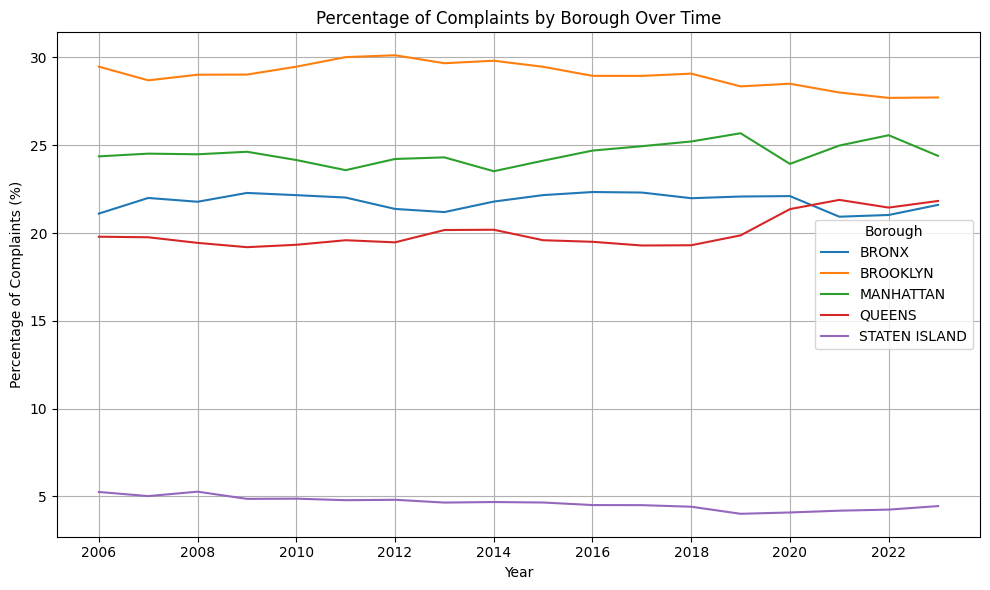

In [30]:
import matplotlib.ticker as mticker

df_clean = df[df['BORO_NM'] != '(null)']


# Group by year and borough, then count complaints
complaints_per_year_boro = df_clean.groupby(['year_begin', 'BORO_NM']).size().unstack(fill_value=0)

# Convert to percentage per year
complaints_percent = complaints_per_year_boro.div(complaints_per_year_boro.sum(axis=1), axis=0) * 100

# Plot
plt.figure(figsize=(10, 6))
for boro in complaints_percent.columns:
    plt.plot(complaints_percent.index, complaints_percent[boro], label=boro)

plt.title('Percentage of Complaints by Borough Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Complaints (%)')
plt.legend(title='Borough')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

{'07': 176887, '22': 378776, '03': 167772, '09': 312916, '01': 253203, '06': 120419, '15': 492278, '19': 464590, '11': 338459, '17': 481420, '02': 202394, '21': 405679, '18': 487147, '20': 454318, '23': 342513, '10': 331191, '16': 476615, '00': 364001, '12': 467124, '14': 441274, '08': 283212, '04': 143125, '05': 108199, '13': 396497}


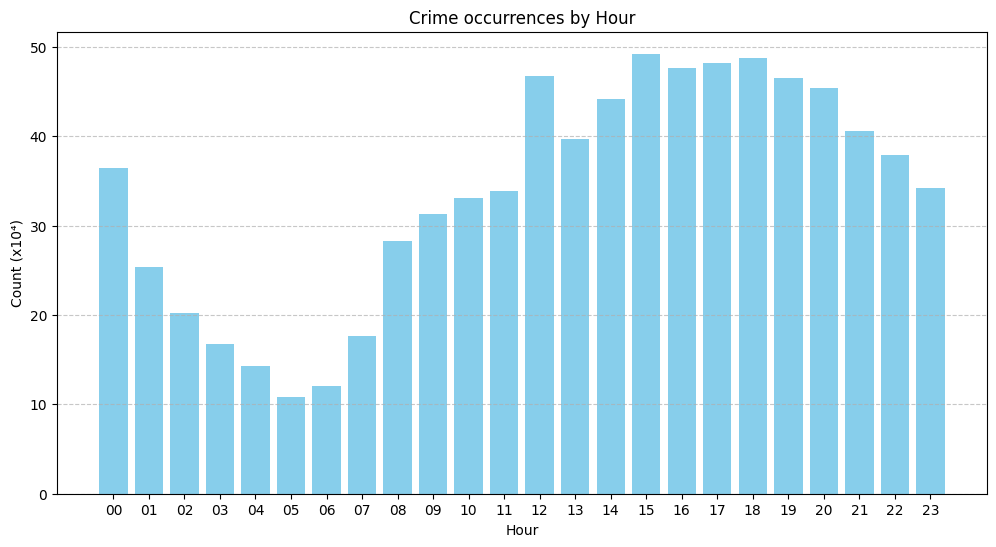

In [31]:
hours=df['CMPLNT_FR_TM'].str[:2]
hours=hours[~(hours=='(n')]
hours_dict=hours.value_counts(sort=False).to_dict()
print(hours_dict)
hours_sorted = dict(sorted(hours_dict.items(), key=lambda x: int(x[0])))

plt.figure(figsize=(12, 6))
plt.bar(hours_sorted.keys(), np.array(list(hours_sorted.values())) / 1e4, color='skyblue')
plt.xlabel("Hour")
plt.ylabel("Count (x10⁴)")
plt.title("Crime occurrences by Hour")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

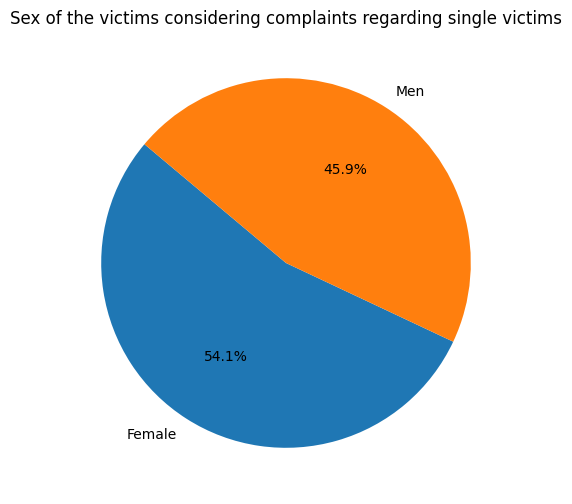

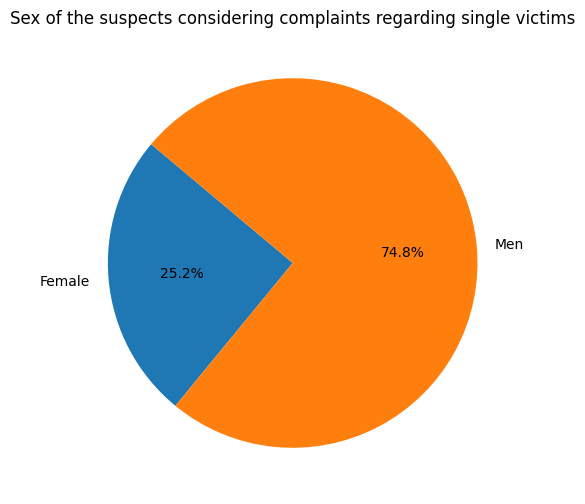

In [32]:
df_gender = df.query("(VIC_SEX == 'F')| (VIC_SEX =='M')")

labels= ["Female", "Men"]
sizes = [df_gender['VIC_SEX'].value_counts().get('F', 0),
         df_gender['VIC_SEX'].value_counts().get('M', 0)]


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sex of the victims considering complaints regarding single victims')
plt.show()

df_gender_susp = df[df['SUSP_SEX'].isin(['F', 'M'])]

labels= ["Female", "Men"]
sizes = [df_gender_susp['SUSP_SEX'].value_counts().get('F', 0),
         df_gender_susp['SUSP_SEX'].value_counts().get('M', 0)]


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sex of the suspects considering complaints regarding single victims')
plt.show()

rgb(110,150,255)
rgb(110,150,255)
rgb(112,153,243)
rgb(112,153,243)
rgb(114,156,232)
rgb(114,156,232)
rgb(116,160,221)
rgb(118,163,210)
rgb(118,163,210)
rgb(121,166,199)
rgb(123,170,188)
rgb(123,170,188)
rgb(123,170,188)
rgb(125,173,177)
rgb(125,173,177)
rgb(125,173,177)
rgb(125,173,177)
rgb(127,176,166)
rgb(127,176,166)
rgb(130,180,155)


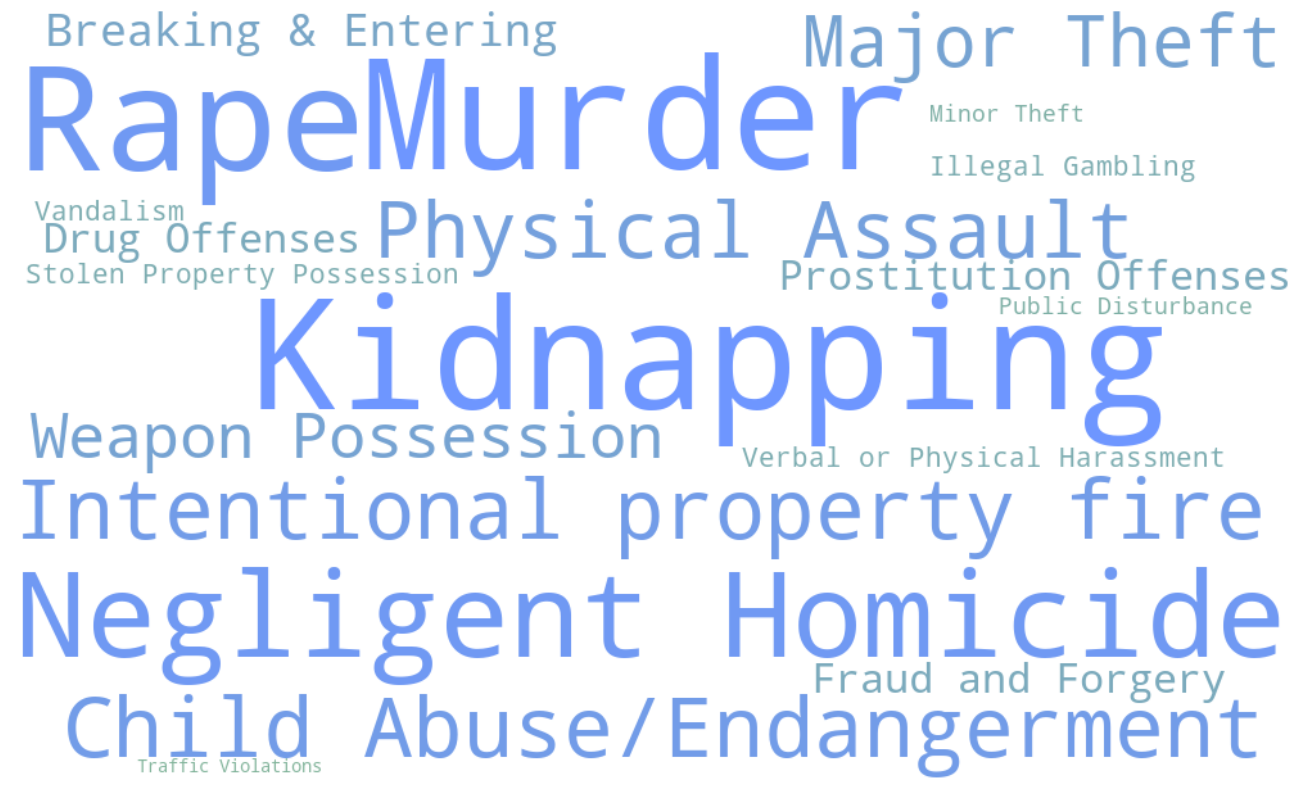

Plot saved at /Users/elsa/EPFL/MA4/Data_vis/BluePink/images/crime_type.png


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

# Severity scores
severity = {
    'Breaking & Entering': 5,
    'Major Theft': 6,
    'Physical Assault': 7,
    'Minor Theft': 2,
    'Verbal or Physical Harassment': 3,
    'Weapon Possession': 6,
    'Vandalism': 3,
    'Fraud and Forgery': 4,
    'Drug Offenses': 4,
    'Public Disturbance': 2,
    'Traffic Violations': 1,
    'Rape': 9,
    'Intentional property fire': 8,
    'Illegal Gambling': 3,
    'Kidnapping': 10,
    'Stolen Property Possession': 3,
    'Child Abuse/Endangerment': 8,
    'Prostitution Offenses': 4,
    'Negligent Homicide': 9,
    'Murder': 10
}

# Color function: black (low severity) to red (high severity)
def black_to_red(word, font_size, position, orientation, random_state=None, **kwargs):
    score = severity.get(word, 1)
    # Normalize score to [0, 1]
    t = (score - 1) / 9  # min=1, max=10
    r = int(255 * t)
    return f"rgb({r},0,0)"  # black to red gradient

def black_to_pastel_blue(word, font_size, position, orientation, random_state=None, **kwargs):
    score = severity.get(word, 1)
    t = (score - 1) / 9  # Normalize score between 0 and 1

    # Start from very light blue and increase slightly in blue saturation
    r = int(130 - 20 * t)  
    g = int(180 - 30 * t)  
    b = int(255 - 100 * (1 - t))  
    print(f"rgb({r},{g},{b})")
    return f"rgb({r},{g},{b})"



# Create word cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    max_font_size=120,
    prefer_horizontal=1.0,
    color_func=black_to_pastel_blue
).generate_from_frequencies(severity)

output_path = "../images/crime_type.png"
abs_path = os.path.abspath(output_path)

# Display it
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig(abs_path)
plt.show()

print(f"Plot saved at {abs_path}")



In [34]:
rape_df = df[df['OFNS_DESC'] == 'Rape']
rape_counts_per_year = rape_df.groupby('year_begin').size()
average_rape_per_year = rape_counts_per_year.mean()
print("Average number of rape complaints per year:", average_rape_per_year)

rape_df = df[df['OFNS_DESC'] == 'Murder']
rape_counts_per_year = rape_df.groupby('year_begin').size()
average_rape_per_year = rape_counts_per_year.mean()
print("Average number of murder complaints per year:", average_rape_per_year)

rape_df = df[df['OFNS_DESC'] == 'Intentional property fire']
rape_counts_per_year = rape_df.groupby('year_begin').size()
average_rape_per_year = rape_counts_per_year.mean()
print("Average number of intentional property fire complaints per year:", average_rape_per_year)

rape_df = df[df['OFNS_DESC'] == 'Kidnapping']
rape_counts_per_year = rape_df.groupby('year_begin').size()
average_rape_per_year = rape_counts_per_year.mean()
print("Average number of kidnapping complaints per year:", average_rape_per_year)



Average number of rape complaints per year: 1398.2222222222222
Average number of murder complaints per year: 411.3333333333333
Average number of intentional property fire complaints per year: 1085.0555555555557
Average number of kidnapping complaints per year: 186.27777777777777


In [108]:
import plotly.express as px
import pandas as pd

# Filter out null boroughs
df_clean = df[df['BORO_NM'] != '(null)']

# Count complaints per borough
sizes = df_clean['BORO_NM'].value_counts().reset_index()
sizes.columns = ['Borough', 'Count']

# Define custom pastel/bluish-green color palette
colors = ['#a8dadc', '#457b9d', '#74c69d', '#b5ead7', '#9ad0ec']

# Create pie chart
fig = px.pie(
    sizes,
    names='Borough',
    values='Count',
    color_discrete_sequence=colors,
    hole=0.4  # slightly larger hole for less visual clutter
)

# Update trace: remove label clutter
fig.update_traces(
    textinfo='percent',  # remove redundant 'label' in tight space
    pull=[0.02] * len(sizes),
    textfont_size=10
)

# Layout tuning
fig.update_layout(
    title_text="Complaints by Borough",
    title_font=dict(size=12),
    title_x=0.5,
    showlegend=True,  # optional: hide legend if labels are visible
    margin=dict(t=30, b=30, l=10, r=10),
    width=350,
    height=350
)

fig.write_html("../images/borough_complaints_pie.html")
fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Clean and prepare data
df_clean = df[df['BORO_NM'] != '(null)']
sizes = df_clean['BORO_NM'].value_counts().reset_index()
sizes.columns = ['Borough', 'Count']

sizes["Population"] = sizes['Borough'].map({
    'BROOKLYN': 2679620,
    'QUEENS': 2388864,
    'MANHATTAN': 1645867,
    'BRONX': 1356476,
    'STATEN ISLAND': 492925
})

sizes["Population %"] = (sizes["Population"] / sizes["Population"].sum()) * 100
sizes_sorted = sizes.sort_values("Population", ascending=True)

# Create figure from the Bar trace
fig = go.Figure(
    data=go.Bar(
        x=sizes_sorted['Population'],
        y=sizes_sorted['Borough'],
        orientation='h',
        marker_color='#457b9d',
        text=[f"{pop:,.0f} ({pct:.1f}%)" for pop, pct in zip(sizes_sorted['Population'], sizes_sorted['Population %'])],
        hovertemplate='<b>%{y}</b><br>Population: %{text}<extra></extra>'
    )
)

# Update layout
fig.update_layout(
    height=300,
    width=400,
    title_x=0.5,
    title_text="Population by Borough",
    plot_bgcolor='white',
    xaxis_title="Population",
    yaxis_title="Borough",
    margin=dict(t=50, r=30, l=30),
    title_font=dict(size=14)
)

# Save and show
fig.write_html("../images/population_bar.html")
fig.show()


In [60]:
sizes

,Borough,Count
0,BROOKLYN,2344416
1,MANHATTAN,1981736
2,BRONX,1760777
3,QUEENS,1620768
4,STATEN ISLAND,374985


In [ ]:
Brooklyn= 2679620
Queens= 2388864
Manhattan= 1645867
Bronx= 1356476
Staten_Island=492925

total_pop = Brooklyn + Queens + Manhattan + Bronx + Staten_Island
Staten_Island_perc = Staten_Island / total_pop * 100
Brooklyn_perc = Brooklyn / total_pop * 100
Queens_perc = Queens / total_pop * 100
Manhattan_perc = Manhattan / total_pop * 100
Bronx_perc = Bronx / total_pop * 100
print(f"Brooklyn population percentage: {Brooklyn_perc:.2f}%")
print(f"Queens population percentage: {Queens_perc:.2f}%")
print(f"Manhattan population percentage: {Manhattan_perc:.2f}%")
print(f"Bronx population percentage: {Bronx_perc:.2f}%")
print(f"Staten Island population percentage: {Staten_Island_perc:.2f}%")

Brooklyn population percentage: 31.29%
Queens population percentage: 27.90%
Manhattan population percentage: 19.22%
Bronx population percentage: 15.84%
Staten Island population percentage: 5.76%


In [63]:
sizes["Population"] = sizes['Borough'].map({
    'BROOKLYN': Brooklyn,
    'QUEENS': Queens,
    'MANHATTAN': Manhattan,
    'BRONX': Bronx,
    'STATEN ISLAND': Staten_Island
})


In [66]:
sizes

,Borough,Count,Population
0,BROOKLYN,2344416,2679620
1,MANHATTAN,1981736,1645867
2,BRONX,1760777,1356476
3,QUEENS,1620768,2388864
4,STATEN ISLAND,374985,492925


In [67]:
sizes.Count.corr(sizes.Population)
from scipy import stats
pearson = stats.pearsonr(sizes['Count'],sizes['Population'])
print(f"Pearson correlation has a coefficient of {pearson[0]:.3} with a p-value of {pearson[1]:.3}.")

Pearson correlation has a coefficient of 0.829 with a p-value of 0.0829.


## Time evolution

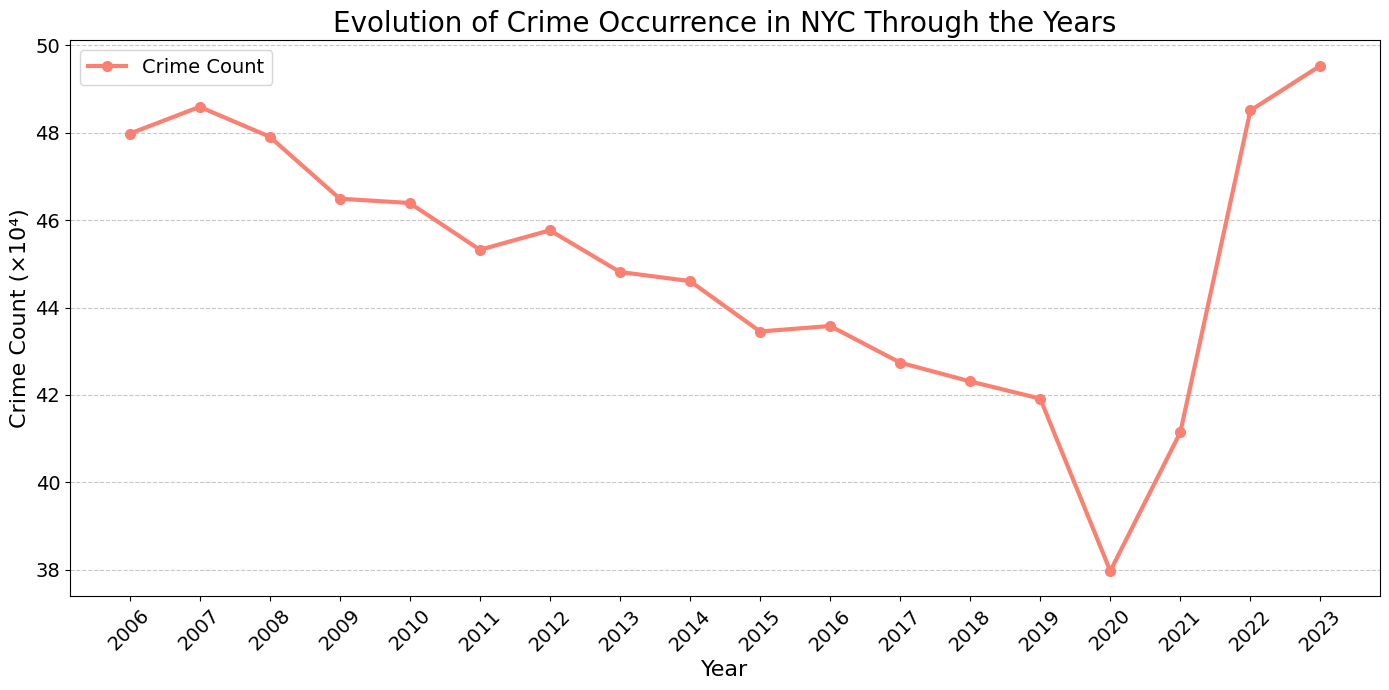

In [36]:
df_year = df.groupby('year_begin').agg(
    nb_crimes=('year_begin', 'size')
).reset_index()

#Crop from 2006 not enough data
df_year = df_year.query("year_begin >= 2006")


plt.figure(figsize=(14, 7))

# Line plot with dots at each year
plt.plot(df_year["year_begin"], df_year["nb_crimes"] / 1e4,
         marker='o', linestyle='-', color='salmon', linewidth=3, markersize=7, label='Crime Count')

# X-axis labels: show every year, rotate for readability
plt.xticks(df_year["year_begin"], rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Labels and title with larger font sizes
plt.xlabel("Year", fontsize=16)
plt.ylabel("Crime Count (×10⁴)", fontsize=16)
plt.title("Evolution of Crime Occurrence in NYC Through the Years", fontsize=20)

# Grid and optional legend
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()


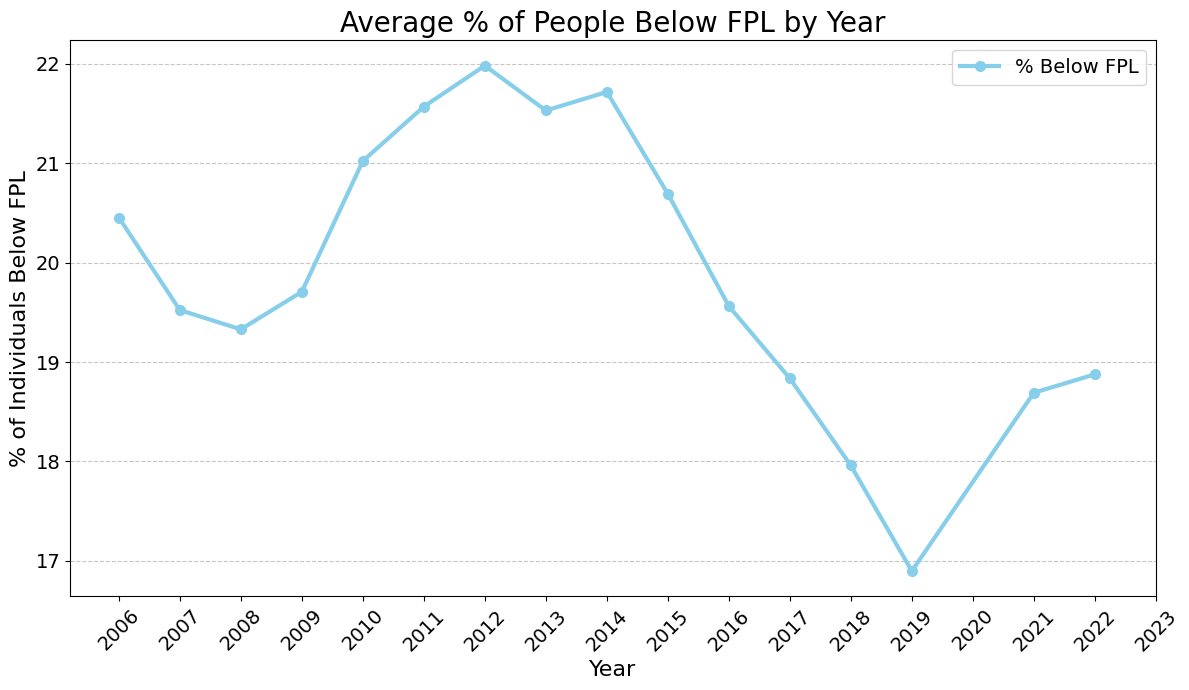

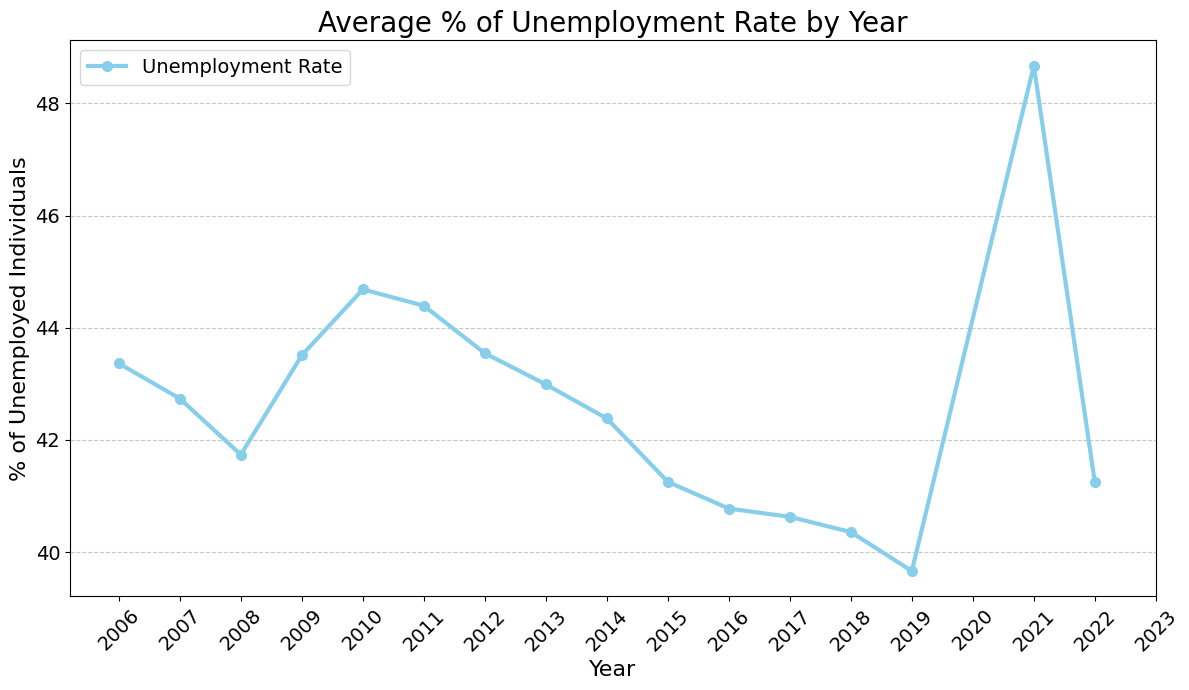

In [37]:
avg_fpl_by_year = df_eco.groupby('Year')['individuals_below_FPL'].mean().reset_index()
avg_fpl_by_year = avg_fpl_by_year.query("Year >= 2006")


emp_by_year = df_eco.groupby('Year')['Employement_pop_ratio'].mean().reset_index()
emp_by_year = emp_by_year.query("Year >= 2006")

import matplotlib.pyplot as plt

# --- Plot 1: % Below FPL ---
plt.figure(figsize=(12, 7))
plt.plot(avg_fpl_by_year['Year'], avg_fpl_by_year['individuals_below_FPL'] * 100,
         marker='o', linestyle='-', color='skyblue', linewidth=3, markersize=7, label='% Below FPL')
plt.title('Average % of People Below FPL by Year', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('% of Individuals Below FPL', fontsize=16)
plt.xticks(df_year["year_begin"], rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


# --- Plot 2: Unemployment Rate ---
plt.figure(figsize=(12, 7))
plt.plot(emp_by_year['Year'], (1 - emp_by_year['Employement_pop_ratio']) * 100,
         marker='o', linestyle='-', color='skyblue', linewidth=3, markersize=7, label='Unemployment Rate')
plt.title('Average % of Unemployment Rate by Year', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('% of Unemployed Individuals', fontsize=16)
plt.xticks(df_year["year_begin"], rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


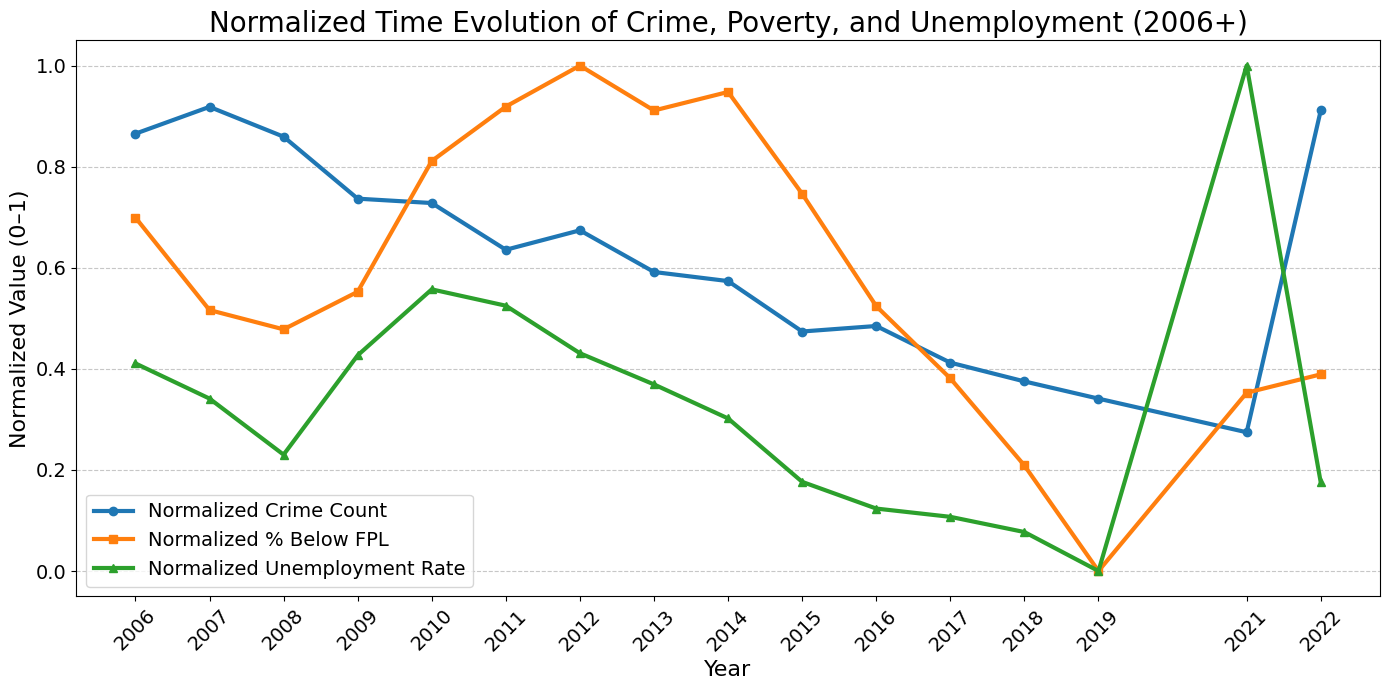

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Normalize helper function ---
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# --- Prepare data ---

# Crime data
df_year = df.groupby('year_begin').agg(nb_crimes=('year_begin', 'size')).reset_index()
df_year = df_year.query("year_begin >= 2006")
df_year['nb_crimes_norm'] = normalize(df_year['nb_crimes'])

# FPL data
avg_fpl_by_year = df_eco.groupby('Year')['individuals_below_FPL'].mean().reset_index()
avg_fpl_by_year = avg_fpl_by_year.query("Year >= 2006")
avg_fpl_by_year['fpl_norm'] = normalize(avg_fpl_by_year['individuals_below_FPL'])

# Unemployment data (1 - employment ratio)
emp_by_year = df_eco.groupby('Year')['Employement_pop_ratio'].mean().reset_index()
emp_by_year = emp_by_year.query("Year >= 2006")
emp_by_year['unemp_rate'] = 1 - emp_by_year['Employement_pop_ratio']
emp_by_year['unemp_norm'] = normalize(emp_by_year['unemp_rate'])

# --- Merge all into one DataFrame for consistency ---
merged = pd.merge(df_year[['year_begin', 'nb_crimes_norm']], 
                  avg_fpl_by_year[['Year', 'fpl_norm']], 
                  left_on='year_begin', right_on='Year')
merged = pd.merge(merged, 
                  emp_by_year[['Year', 'unemp_norm']], 
                  on='Year')

# --- Plot ---
plt.figure(figsize=(14, 7))

plt.plot(merged['year_begin'], merged['nb_crimes_norm'], marker='o', linewidth=3, label='Normalized Crime Count')
plt.plot(merged['year_begin'], merged['fpl_norm'], marker='s', linewidth=3, label='Normalized % Below FPL')
plt.plot(merged['year_begin'], merged['unemp_norm'], marker='^', linewidth=3, label='Normalized Unemployment Rate')

plt.title("Normalized Time Evolution of Crime, Poverty, and Unemployment (2006+)", fontsize=20)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Normalized Value (0–1)", fontsize=16)
plt.xticks(merged['year_begin'], rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


## Crime number (by type) Vs eco

In [39]:
df_eco_by_district = df_eco.groupby('District_Code').agg(
                    District = ('District', 'first'),
                    individuals_below_FPL_mean = ('individuals_below_FPL', 'mean'),
                    individuals_below_FPL_std = ('individuals_below_FPL', 'std'),
                    Employement_pop_ratio_mean = ('Employement_pop_ratio', 'mean'),
                    Employement_pop_ratio_std = ('Employement_pop_ratio', 'std'),
).reset_index()

df_eco_by_district.head()

,District_Code,District,individuals_below_FPL_mean,individuals_below_FPL_std,Employement_pop_ratio_mean,Employement_pop_ratio_std
0,101,Battery Park/Tribeca,0.082432,0.013163,0.695889,0.106929
1,102,Greenwich Village,0.082432,0.013163,0.703876,0.074474
2,103,Lower East Side,0.263308,0.024709,0.541882,0.016074
3,104,Chelsea/Clinton,0.130939,0.013761,0.690845,0.070434
4,105,Midtown Business District,0.127174,0.015678,0.677218,0.123798


In [40]:
crime_counts = df.groupby(['OFNS_DESC', 'District_Code']).size().reset_index(name='count')
crime_counts.head(10)

# merge the two dataframes on District_Code
df_merged = pd.merge(df_eco_by_district, crime_counts, on='District_Code', how='left')
df_merged.head()



,District_Code,District,individuals_below_FPL_mean,individuals_below_FPL_std,Employement_pop_ratio_mean,Employement_pop_ratio_std,OFNS_DESC,count
0,101,Battery Park/Tribeca,0.082432,0.013163,0.695889,0.106929,Breaking & Entering,2686
1,101,Battery Park/Tribeca,0.082432,0.013163,0.695889,0.106929,Child Abuse/Endangerment,8
2,101,Battery Park/Tribeca,0.082432,0.013163,0.695889,0.106929,Drug Offenses,1207
3,101,Battery Park/Tribeca,0.082432,0.013163,0.695889,0.106929,Fraud and Forgery,8374
4,101,Battery Park/Tribeca,0.082432,0.013163,0.695889,0.106929,Illegal Gambling,46


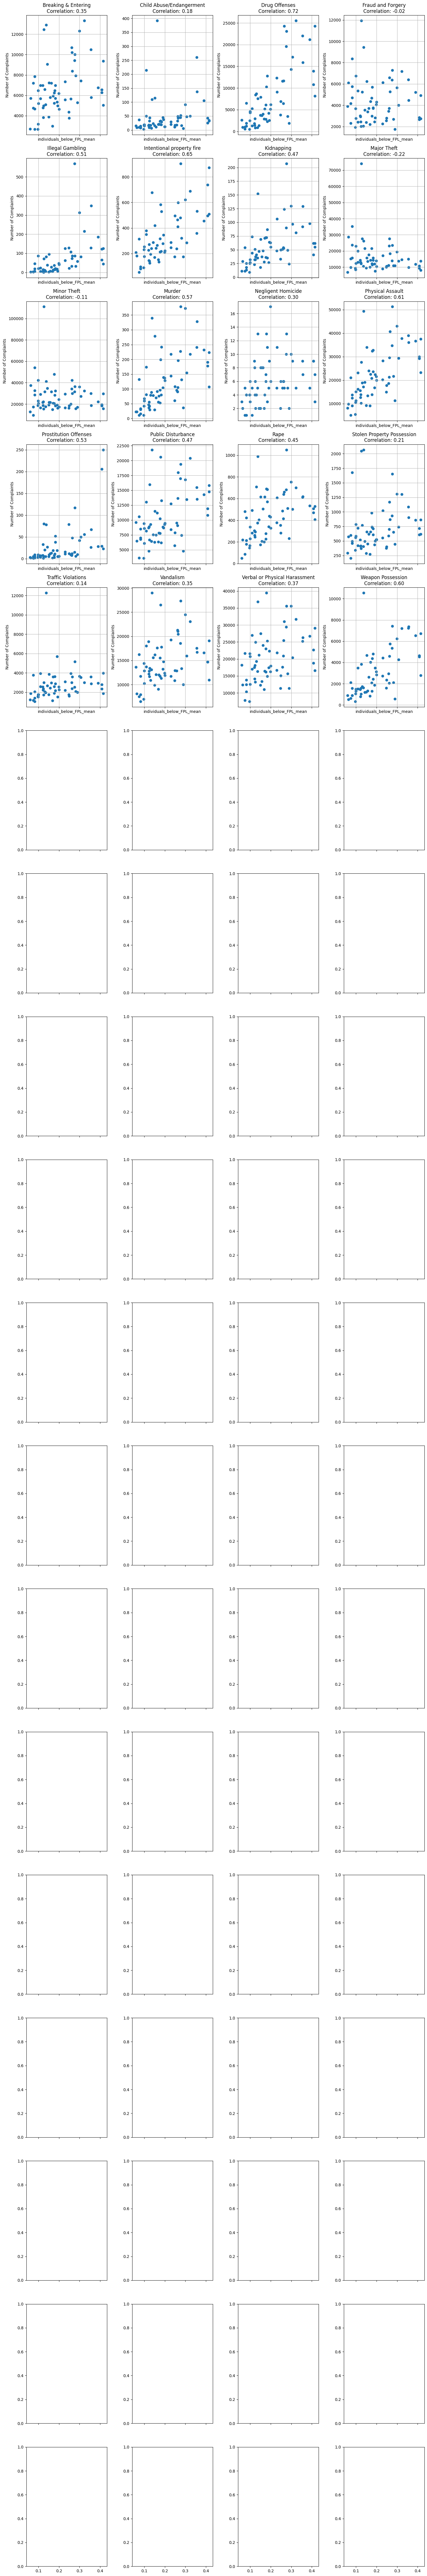

In [41]:
offense_types = df_merged['OFNS_DESC'].unique()
n_offenses = len(offense_types)

# Set up subplots
fig, axes = plt.subplots(18, 4, figsize=(15, 5 * 18), sharex=True)
axes = axes.flatten()  

# If only one offense type, axes isn't an array
if n_offenses == 1:
    axes = [axes]

# Plot each offense type in a separate subplot
for i, offense in enumerate(offense_types):
    subset = df_merged[df_merged['OFNS_DESC'] == offense]
    corr=subset['individuals_below_FPL_mean'].corr(subset['count'])
    axes[i].scatter(subset['individuals_below_FPL_mean'], subset['count'])
    axes[i].set_title(f"{offense}\nCorrelation: {corr:.2f}")
    axes[i].set_xlabel('individuals_below_FPL_mean')
    axes[i].set_ylabel('Number of Complaints')
    axes[i].grid(True)

plt.tight_layout()
plt.show()



In [42]:
#load GPS.csv data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_folder='../data/'

df_gps = pd.read_csv(data_folder + 'website_data/' + 'GPS.csv')

#groupby the two columns 'District_code' and 'count' like this : District_Code, count
                                        #                            101,  45
                                        #                            102,  23 
                                        #                            etc

grouped_df = df_gps.groupby('District_Code', as_index=False)['count'].sum()

grouped_df.head()
 

,District_Code,count
0,101.0,105224
1,102.0,169005
2,103.0,213885
3,104.0,158682
4,105.0,322140


In [43]:
grouped_df.to_json('grouped_data.json', orient='records', lines=False)
